# Sentimental classification of news headlines

In [234]:
#Importing all required libraries
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import datetime
import re 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#nltk.download('vader_lexicon')

### Data reading

In [235]:
#reading our csv file containing news headlines
df=pd.read_csv(r"C:\Users\Rakshu\Downloads\india-news-headlines.csv.zip",encoding="ISO-8859-1",parse_dates=['publish_date'])
df

publish_date                  headline_category  \
0         2001-01-02                            unknown   
1         2001-01-02                            unknown   
2         2001-01-02                            unknown   
3         2001-01-02                            unknown   
4         2001-01-02                            unknown   
...              ...                                ...   
3424062   2020-12-31                       city.jodhpur   
3424063   2020-12-31                       city.udaipur   
3424064   2020-12-31                         city.ajmer   
3424065   2020-12-31                            removed   
3424066   2020-12-31  entertainment.bengali.movies.news   

                                             headline_text  
0        Status quo will not be disturbed at Ayodhya; s...  
1                      Fissures in Hurriyat over Pak visit  
2                    America's unwanted heading for India?  
3                       For bigwigs; it is destination Goa  
4                     Extra buses to clear tourist traffic  
...                                                    ...  
3424062  Covid-19: Despite dip in cases; Rajasthan amon...  
3424063  Covid-19: Despite dip in cases; Rajasthan amon...  
3424064  Covid-19: Despite dip in cases; Rajasthan amon...  
3424065  Govt extends deadline for use of FASTag till F...  
3424066  Celebs plan to party safely and responsibly on...  

[3424067 rows x 3 columns]

In [236]:
print("Enter dates between which you wish to analyse the data in YYYY-MM-DD format")
datestart=input("Enter starting date: ")
startdate=datetime.datetime.strptime(datestart,"%Y-%m-%d")
dateend=input("Enter ending date: ")
enddate=datetime.datetime.strptime(dateend,"%Y-%m-%d")

Enter dates between which you wish to analyse the data in YYYY-MM-DD format
Enter starting date: 2019-01-01
Enter ending date: 2019-12-31


In [237]:
#Filtering the data of csv file
df.drop(df.index[(df['publish_date']<startdate)|(df['publish_date']>enddate)],axis=0,inplace=True)
df

publish_date                        headline_category  \
3059314   2019-01-01                  life-style.fashion.buzz   
3059315   2019-01-01  life-style.health-fitness.home-remedies   
3059316   2019-01-01                        life-style.events   
3059317   2019-01-01                        life-style.events   
3059318   2019-01-01                               city.kochi   
...              ...                                      ...   
3241453   2019-12-31                            city.amritsar   
3241454   2019-12-31                           city.hyderabad   
3241455   2019-12-31                              city.nagpur   
3241456   2019-12-31                              city.nagpur   
3241457   2019-12-31                               city.delhi   

                                             headline_text  
3059314    are you guilty of making these fashion faux pas  
3059315  Happy New Year 2020: How to get rid of a hango...  
3059316  Happy New Year Card Ideas 2020: Checkout these...  
3059317  happy new year 2019 images cards gifs pictures...  
3059318         Building teams with thumping African music  
...                                                    ...  
3241453  No relief from cold; two killed in road accide...  
3241454  Hyderabad man dies at EDM fest; third death in...  
3241455  A trip to a tribal village with super cop Vija...  
3241456  Wi-Fi at over 5;500 railway stations; thanks t...  
3241457  Hardeep Singh Puri blames Kejriwal govt for De...  

[182144 rows x 3 columns]

### Data cleaning and pre-processing

In [238]:
#creating new column to store cleaned data
df["new_headline"]=df["headline_text"]

In [239]:
#converting all data to lower case
df['new_headline']=df['new_headline'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [240]:
#removing all special characters
df['new_headline']=df['new_headline'].str.replace('[^\w\s]','',regex=True)

In [241]:
#removing stopwords
stop=stopwords.words('english')
df["new_headline"]=df["new_headline"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [242]:
#removing numeric digits
def removenum(text):
    result=re.sub(r'\d+', '', text)
    return result

df['new_headline']=df['new_headline'].apply(removenum)

In [243]:
#lemmatization of data
lemmatizer=WordNetLemmatizer()

def lemm(text):
    word_list=nltk.word_tokenize(text)
    lemm_output=' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lemm_output

df['new_headline']=df['new_headline'].apply(lemm, convert_dtype=True, args=())

In [244]:
df

publish_date                        headline_category  \
3059314   2019-01-01                  life-style.fashion.buzz   
3059315   2019-01-01  life-style.health-fitness.home-remedies   
3059316   2019-01-01                        life-style.events   
3059317   2019-01-01                        life-style.events   
3059318   2019-01-01                               city.kochi   
...              ...                                      ...   
3241453   2019-12-31                            city.amritsar   
3241454   2019-12-31                           city.hyderabad   
3241455   2019-12-31                              city.nagpur   
3241456   2019-12-31                              city.nagpur   
3241457   2019-12-31                               city.delhi   

                                             headline_text  \
3059314    are you guilty of making these fashion faux pas   
3059315  Happy New Year 2020: How to get rid of a hango...   
3059316  Happy New Year Card Ideas 2020: Checkout these...   
3059317  happy new year 2019 images cards gifs pictures...   
3059318         Building teams with thumping African music   
...                                                    ...   
3241453  No relief from cold; two killed in road accide...   
3241454  Hyderabad man dies at EDM fest; third death in...   
3241455  A trip to a tribal village with super cop Vija...   
3241456  Wi-Fi at over 5;500 railway stations; thanks t...   
3241457  Hardeep Singh Puri blames Kejriwal govt for De...   

                                              new_headline  
3059314                      guilty making fashion faux pa  
3059315     happy new year get rid hangover new year party  
3059316  happy new year card idea checkout outstanding ...  
3059317  happy new year image card gifs picture quote w...  
3059318               building team thumping african music  
...                                                    ...  
3241453  relief cold two killed road accident due fog f...  
3241454    hyderabad man dy edm fest third death three day  
3241455    trip tribal village super cop vijayan memorable  
3241456                wifi railway station thanks railtel  
3241457  hardeep singh puri blame kejriwal govt delhi p...  

[182144 rows x 4 columns]

### Sentiment analysis

In [245]:
#calculating polarity score
senti=SentimentIntensityAnalyzer()
def getscore(review):
    cs=senti.polarity_scores(review)['compound']
    return cs

In [246]:
#new column to store polarity score
df['score']=df['new_headline'].apply(getscore)

In [247]:
#finding the sentiment attached to the score
def getsentiment(score):
    if score>0:
        return 'Positive'
    elif score<0:
        return 'Negative'
    else:
        return 'Neutral'

In [248]:
#new column to store the sentiment(positive/negative/neutral)
df['sentiment']=df['score'].apply(getsentiment)

In [249]:
df

publish_date                        headline_category  \
3059314   2019-01-01                  life-style.fashion.buzz   
3059315   2019-01-01  life-style.health-fitness.home-remedies   
3059316   2019-01-01                        life-style.events   
3059317   2019-01-01                        life-style.events   
3059318   2019-01-01                               city.kochi   
...              ...                                      ...   
3241453   2019-12-31                            city.amritsar   
3241454   2019-12-31                           city.hyderabad   
3241455   2019-12-31                              city.nagpur   
3241456   2019-12-31                              city.nagpur   
3241457   2019-12-31                               city.delhi   

                                             headline_text  \
3059314    are you guilty of making these fashion faux pas   
3059315  Happy New Year 2020: How to get rid of a hango...   
3059316  Happy New Year Card Ideas 2020: Checkout these...   
3059317  happy new year 2019 images cards gifs pictures...   
3059318         Building teams with thumping African music   
...                                                    ...   
3241453  No relief from cold; two killed in road accide...   
3241454  Hyderabad man dies at EDM fest; third death in...   
3241455  A trip to a tribal village with super cop Vija...   
3241456  Wi-Fi at over 5;500 railway stations; thanks t...   
3241457  Hardeep Singh Puri blames Kejriwal govt for De...   

                                              new_headline   score sentiment  
3059314                      guilty making fashion faux pa -0.4215  Negative  
3059315     happy new year get rid hangover new year party  0.7506  Positive  
3059316  happy new year card idea checkout outstanding ...  0.8834  Positive  
3059317  happy new year image card gifs picture quote w...  0.8402  Positive  
3059318               building team thumping african music  0.0000   Neutral  
...                                                    ...     ...       ...  
3241453  relief cold two killed road accident due fog f... -0.6705  Negative  
3241454    hyderabad man dy edm fest third death three day -0.5994  Negative  
3241455    trip tribal village super cop vijayan memorable  0.5994  Positive  
3241456                wifi railway station thanks railtel  0.4404  Positive  
3241457  hardeep singh puri blame kejriwal govt delhi p... -0.6705  Negative  

[182144 rows x 6 columns]

In [250]:
#counting total number of positive,negative or neutral data
tb_counts = df['sentiment'].value_counts()
tb_counts

Neutral     78682
Negative    61672
Positive    41790
Name: sentiment, dtype: int64

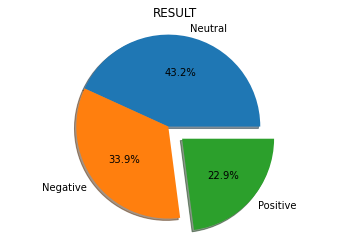

In [259]:
#plotting a pie-chart showing percentage of positive,negative or neutral data 
%matplotlib inline
explode=(0,0,0.2)
plt.pie(tb_counts.values, labels=tb_counts.index,explode=explode,autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.title('RESULT')
plt.show()

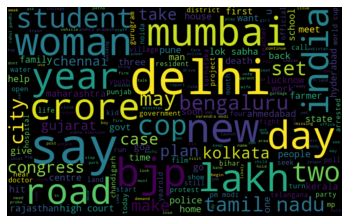

In [260]:
#Plotting our Wordcloud
allWords=' '.join( [text for text in df['new_headline']])
wordCloud=WordCloud(width=800, height=500, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud , interpolation = 'bilinear')
plt.axis('off')
plt.show()